## **Correlação entre gastos com saúde e melhora do sistema**

## Verificou-se que aumentar os gastos melhora o sistema, mas os retornos são decrescentes.

## Bibliotecas utilizadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
import gspread

In [3]:
import plotly.express as px
import plotly.graph_objects as go

In [4]:
import matplotlib.colors as colors

## Carregando os dados que já estão organizados em uma planilha

In [5]:
url = "https://docs.google.com/spreadsheets/d/1nPQZP1p-tU3Iw7gLDRQUBV7X1aQSioqw36EOU-fW8Z0/export?format=csv"
df = pd.read_csv(url)

In [6]:
df.head()

,country,index1,gméd1,gméd%1,Unnamed: 4,index,gméd,gméd%
0,United States,"72,7","15,57583427","15,58",NaN,72.7,15.575834,15.58
1,Sierra Leone,"39,1","11,73723993","11,74",NaN,39.1,11.737240,11.74
2,France,"80,4","10,84335114","10,84",NaN,80.4,10.843351,10.84
3,Germany,"81,1","10,81132952","10,81",NaN,81.1,10.811330,10.81
4,Switzerland,"82,4","10,31888635","10,32",NaN,82.4,10.318886,10.32


## Fazendo uns ajustes finais antes de trabalhar os dados

In [7]:
#quero apenas as colunas country, gméd, gméd%
df = df[['country', 'index', 'gméd%']]

In [8]:
df.head()

,country,index,gméd%
0,United States,72.7,15.58
1,Sierra Leone,39.1,11.74
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32


In [9]:
# Converter os tipos de dados para os corretos
df['index'] = df['index'].astype(float)
df['gméd%'] = df['gméd%'].astype(float)

## Veja como ficou:

In [10]:
df

,country,index,gméd%
0,United States,72.7,15.58
1,Sierra Leone,39.1,11.74
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32
...,...,...,...
156,Syria,50.1,2.44
157,Papua New Guinea,38.4,2.42
158,Equatorial Guinea,40.6,2.20
159,Libya,54.3,2.10


## A seguir, vou começar a trabalhar os dados.



---



## Vou criar um mapa para visualizar algumas coisas interessantes:

## 1- Melhores sistemas de saúde do mundo:

In [98]:
# Create the choropleth map
fig_map = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="index",
    color_continuous_scale=["lightgreen", "seagreen", "darkgreen"],
    range_color=(0, 100),
    title='Melhores Sistemas de Saúde',
    labels={'index':'Qualidade do Sistema de Saúde'},
    hover_name="country"
)

# Customize the layout
fig_map.update_layout(
    geo_scope='world',
    geo_showframe=False,
    geo_showcoastlines=True,
    geo_coastlinecolor='darkgray',
    geo_countrycolor='darkgray'
)

# Display the map
fig_map.show()

## Os melhores sistemas estão nos países mais ricos. Sobretudo nos europeus e no Japão.

In [30]:
# Salva o gráfico como um arquivo HTML
fig_map.write_html("/content/grafico_interativo-saúde_map.html")
from google.colab import files
files.download('/content/grafico_interativo-saúde_map.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Gráfico do percentual de gastos em relação ao PIB com saúde

In [99]:
fig_map0 = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="gméd%",
    color_continuous_scale= ["lightblue", "navy"],
    range_color=(0, 20),
    title="Gastos em saúde (% do PIB) por país",
    labels={"gméd%": "Qualidade do Sistema de Saúde"},
    hover_name="country"
)

# Personalize o layout
fig_map0.update_layout(
    geo_scope="world",
    geo_showframe=False,
    geo_showcoastlines=True,
    geo_coastlinecolor="darkgray",
    geo_countrycolor="darkgray",
    coloraxis_colorbar=dict(title="Percentual do PIB")
)

# Exiba o mapa
fig_map0.show()

In [32]:
# Salva o gráfico como um arquivo HTML
fig_map0.write_html("/content/grafico_interativo-Gastos_map.html")
from google.colab import files
files.download('/content/grafico_interativo-Gastos_map.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



## Verificar umas estatísticas descritivas básicas para me familiarizar com os dados:

## Dados gerais da amostra:

In [11]:
# Análise descritiva das variáveis
df.describe()

,index,gméd%
count,161.000000,161.000000
mean,54.165839,6.049503
std,16.636023,2.375571
min,13.100000,1.160000
25%,40.600000,4.270000
50%,54.600000,5.590000
75%,65.800000,8.020000
max,83.800000,15.580000


## Distribuição da qualidade:

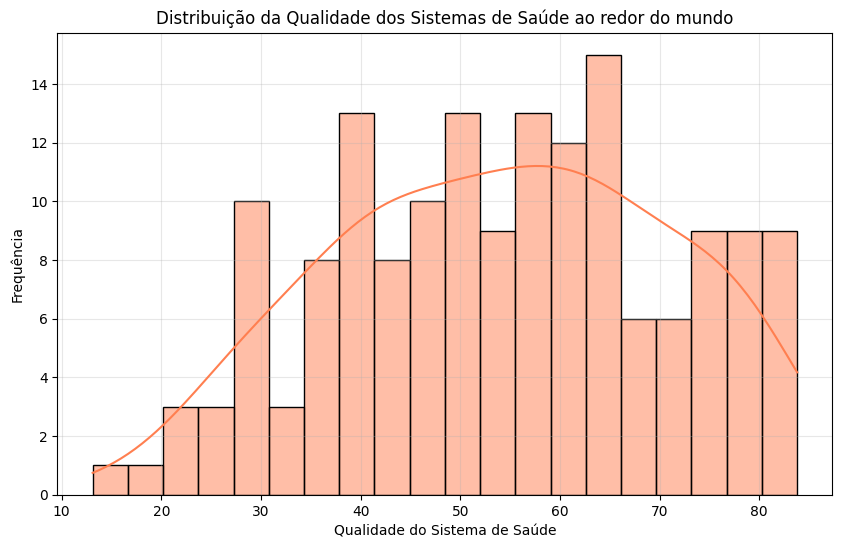

In [103]:
# Histograma da qualidade do sistema de saúde (index)
plt.figure(figsize=(10, 6))
sns.histplot(df['index'], bins=20, kde=True, color='coral')
plt.title('Distribuição da Qualidade dos Sistemas de Saúde ao redor do mundo')
plt.xlabel('Qualidade do Sistema de Saúde')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

## Veja o Box-plot disso

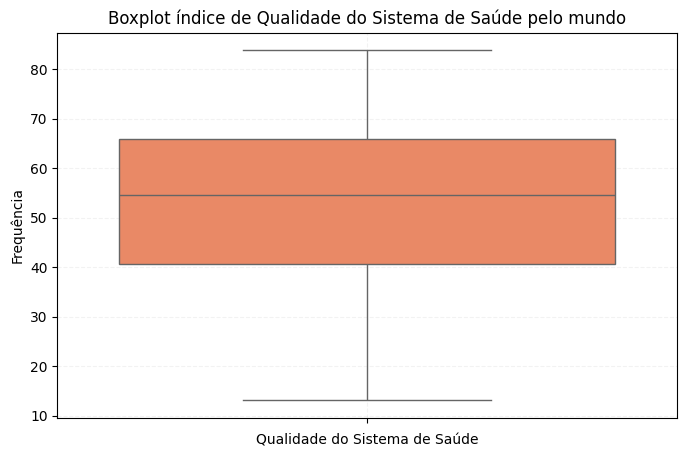

In [104]:
# Boxplot das variáveis para visualização de outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y='index', data=df, color='coral')
plt.title('Boxplot índice de Qualidade do Sistema de Saúde pelo mundo')
plt.xlabel('Qualidade do Sistema de Saúde')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.05, linestyle = '--', color = 'black')
plt.show()

## Distribuição dos gastos com saúde como percentual do PIB por país

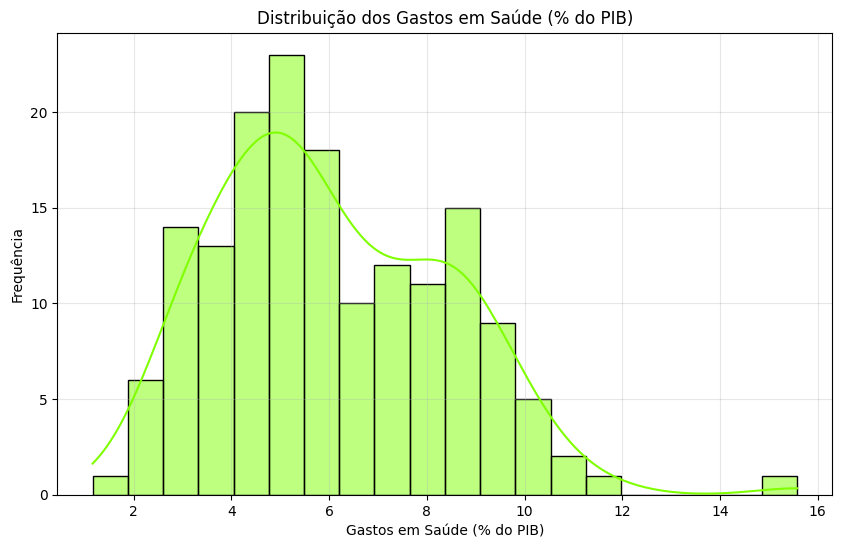

In [105]:
# Histograma dos gastos como percentual do PIB (gméd%)
plt.figure(figsize=(10, 6))
sns.histplot(df['gméd%'], bins=20, kde=True, color='chartreuse')
plt.title('Distribuição dos Gastos em Saúde (% do PIB)')
plt.xlabel('Gastos em Saúde (% do PIB)')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

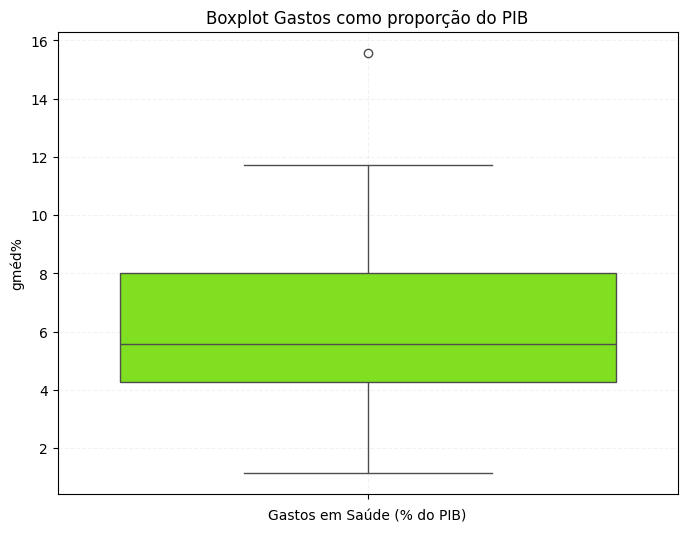

In [106]:
# Boxplot das variáveis para visualização de outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y='gméd%', data=df, color='chartreuse')
plt.title('Boxplot Gastos como proporção do PIB')
plt.xlabel('Gastos em Saúde (% do PIB)')
plt.grid(True, alpha=0.05, linestyle = '--', color = 'black')
plt.show()

## Esse outlier observado são os EUA.

## Veja:

# 5 países com maiores gastos como percentual do PIB:

In [107]:
#vou escrever os 5 maiores gastos
x_maiores = df.nlargest(5, 'gméd%')
x_maiores

,country,index,gméd%
0,United States,72.7,15.58
1,Sierra Leone,39.1,11.74
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32


## 5 países com menores gastos como percentual do PIB

In [108]:
#veja os 5 piores com menos gastos
x_menores = df.nsmallest(5, 'gméd%')
x_menores

,country,index,gméd%
160,South Sudan,13.1,1.16
159,Libya,54.3,2.10
158,Equatorial Guinea,40.6,2.20
157,Papua New Guinea,38.4,2.42
156,Syria,50.1,2.44




---



---



## Estudo da correlação

## Dispersão qualidade do sistema vs. gastos

## Vejamos isso em um gráfico:

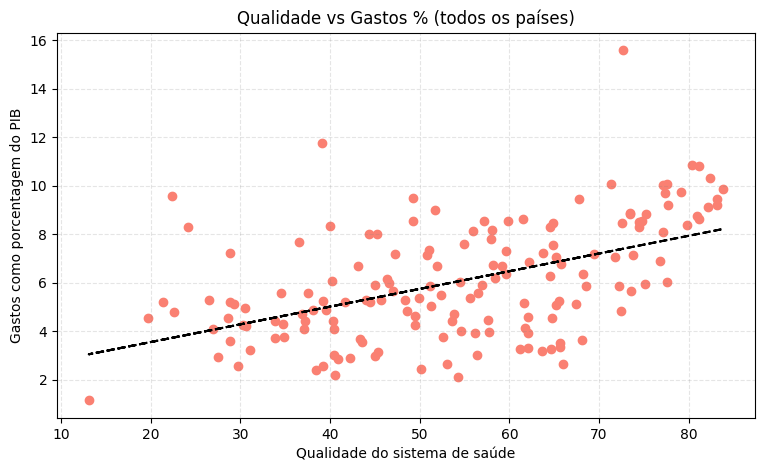

In [12]:
## colocar uma dispersão de index vs gméd%
plt.figure(figsize=(9, 5))
plt.scatter(df['index'], df['gméd%'], c = 'salmon')
plt.xlabel('Qualidade do sistema de saúde')
plt.ylabel('Gastos como porcentagem do PIB')
plt.title('Qualidade vs Gastos % (todos os países)')
plt.grid(True, alpha = 0.2, linestyle ='--', color = 'gray')

#colocar uma linha de tendência
z = np.polyfit(df['index'], df['gméd%'], 1)
p = np.poly1d(z)
plt.plot(df['index'], p(df['index']), linestyle = '--', color='black')
plt.show()

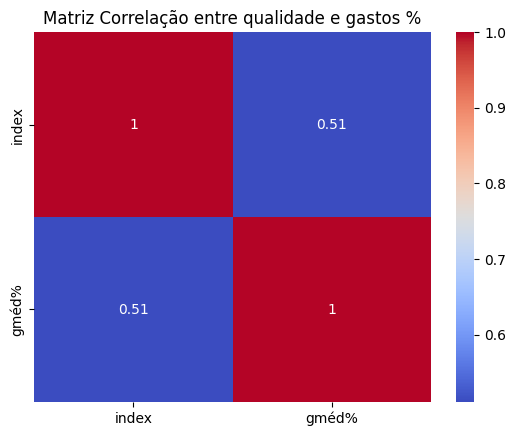

In [13]:
# matriz correlação entre colunas index e gméd%
corr = df[['index', 'gméd%']].corr()
#gráfico da matriz correlação
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz Correlação entre qualidade e gastos %')
plt.show()

## Veja que a correlação linear entre gastos e qualidade do sistema é de 51%. Indicando correlação de moderada à forte.

## Veja que há uma relação notável entre aumento de gastos e aumento da qualidade. Porém, isso está longe de ser perfeita. Note que existe sim uma dispersão um tanto aleatória em alguns pontos, o que indica uma relação longe de ser perfeitamente direta entre os dois fatores.

## Média de gastos como percentual do PIB da amostra

In [14]:
#calcular a média de gméd% dos países (toda a amostra)
media_gméd = df['gméd%'].mean()
print(media_gméd,'%')

6.0495031055900625 %


## Qualidade média dos sistemas de saúde da amostra:
Escala de 0 a 100

In [16]:
#calcular média de qualidade (toda a amostra)
media_index = df['index'].mean()
media_index

54.165838509316764



---



## Vou realizar alguns filtros. A ideia é verificar o que ocorre com a correlação conforme aumentamos a qualidade do sistema de saúde da amostra.

## Isso servirá para verificar se conforme aumentamos os gastos a qualidade acompanha ou não isso.

## **Filtragem 1:** Países com qualidade acima da média geral da amostra

In [19]:
#listar os países acima da média em index
paises_a_index = df[df['index'] > media_index]
print('Qtde de países com índice de qualidade acima da média geral da amostra:', len(paises_a_index), 'países')
print()
print("Veja:")
paises_a_index

Qtde de países com índice de qualidade acima da média geral da amostra: 83 países

Veja:


,country,index,gméd%
0,United States,72.7,15.58
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32
5,Canada,71.3,10.08
...,...,...,...
142,Kazakhstan,64.6,3.26
144,Kuwait,63.6,3.20
147,Azerbaijan,56.4,3.01
153,Qatar,66.0,2.66


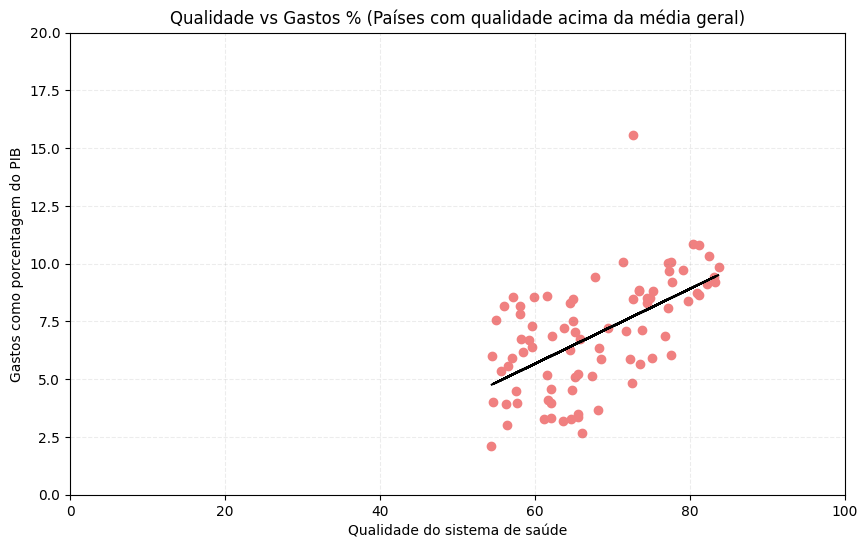

In [33]:
#vou colocar um gráfico de dispersão com os dados de países paises_a_index
plt.figure(figsize=(10, 6))
plt.scatter(paises_a_index['index'], paises_a_index['gméd%'], c = 'lightcoral')
plt.xlabel('Qualidade do sistema de saúde')
plt.ylabel('Gastos como porcentagem do PIB')
plt.title('Qualidade vs Gastos % (Países com qualidade acima da média geral)')
plt.grid(True, alpha = 0.15, linestyle ='--', color = 'gray')

plt.xlim(0, 100)
plt.ylim(0, 20)

#colocar uma linha de tendência
z = np.polyfit(paises_a_index['index'], paises_a_index['gméd%'], 1)
p = np.poly1d(z)
plt.plot(paises_a_index['index'], p(paises_a_index['index']), linestyle = '--', color='black')
plt.show()


<Axes: >

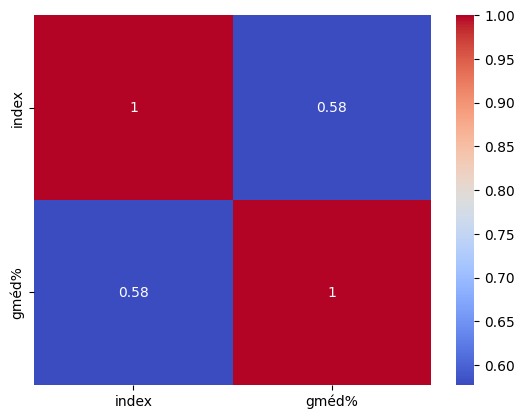

In [22]:
#calcular a matriz correlação para paises_a_index0
corr0 = paises_a_index[['index', 'gméd%']].corr()
#gráfico da matriz de correlação
sns.heatmap(corr0, annot=True, cmap='coolwarm')

## Veja que a correlação aumentou inicialmente. Isso indica que gastos acima da média em saúde devem levar à melhora do sistema.



---



## Vou realizar um novo afunilamento da amostra, filtrando-a para pegar os países com melhor desempenho do sistema de saúde. A ideia é verificar se a correlação continua diminuindo.

## Filtragem 2: Países com boa qualidade de sistema (países com qualidade bem acima da média)

In [27]:
media_index0 = paises_a_index['index'].mean()
print('Média de qualidade desses países com boa qualidade do sistema:', round(media_index0,2), 'pontos')

Média de qualidade desses países com boa qualidade do sistema: 67.68 pontos


## Veja os países

In [29]:
#listar os países acima da média em index
paises_a_index0 = df[df['index'] > media_index0]
print('Qtde de países com bom índice de qualidade:', len(paises_a_index0), 'países')
print()
print("Veja:")
paises_a_index0

Qtde de países com bom índice de qualidade: 38 países

Veja:


,country,index,gméd%
0,United States,72.7,15.58
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32
5,Canada,71.3,10.08
6,Cuba,77.6,10.06
7,Austria,77.1,10.01
8,Belgium,83.8,9.87
9,Denmark,79.1,9.74
10,Netherlands,77.3,9.68


## Nessa nova filtragem saímos de 83 para 38 países. Essses são os 38 com melhores sistemas de saúde. Eles têm índice de qualidade acima dos 67 pontos (numa escala de 0 a 100 de qualidade)

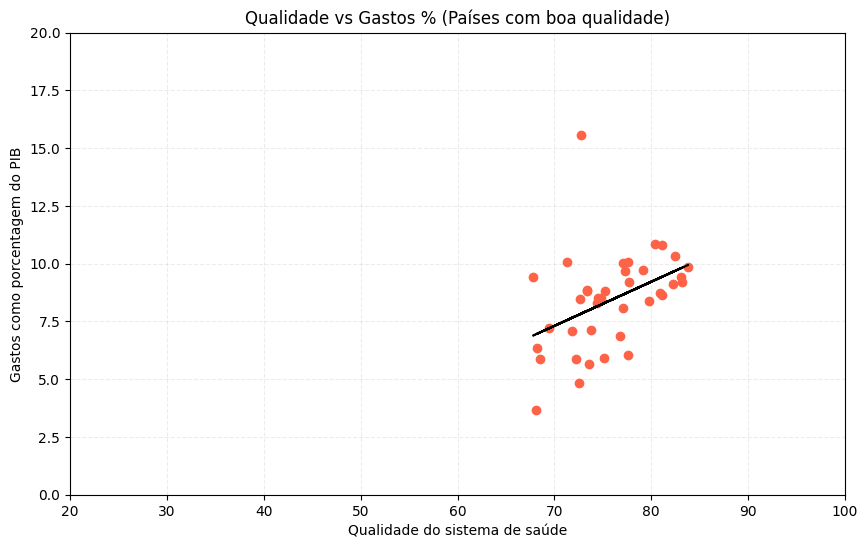

In [36]:
#vou colocar um gráfico de dispersão com os dados de países paises_a_index0
plt.figure(figsize=(10, 6))
plt.scatter(paises_a_index0['index'], paises_a_index0['gméd%'], c = 'tomato')
plt.xlabel('Qualidade do sistema de saúde')
plt.ylabel('Gastos como porcentagem do PIB')
plt.title('Qualidade vs Gastos % (Países com boa qualidade)')
plt.grid(True, alpha = 0.15, linestyle ='--', color = 'gray')

plt.xlim(20, 100)
plt.ylim(0, 20)

#colocar uma linha de tendência
z = np.polyfit(paises_a_index0['index'], paises_a_index0['gméd%'], 1)
p = np.poly1d(z)
plt.plot(paises_a_index0['index'], p(paises_a_index0['index']), linestyle = '--', color='black')
plt.show()

## Matriz correlação:

<Axes: >

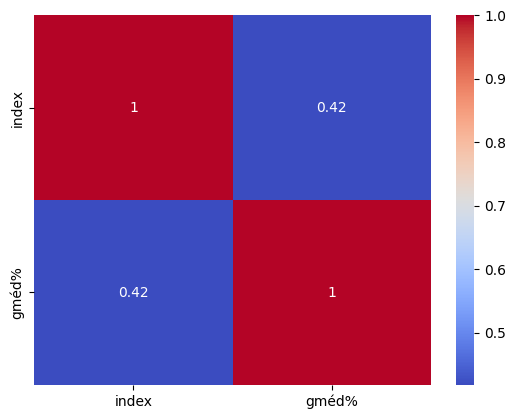

In [37]:
#vou calcular a matriz correlação para paises_index0
corr0 = paises_a_index0[['index', 'gméd%']].corr()
#gráfico da matriz de correlação
sns.heatmap(corr0, annot=True, cmap='coolwarm')

## A matriz de correlação e o gráfico de dispersão demonstram a queda do índice de correlação conforme aumentamos os gastos, para países com qualidade boa.

In [38]:
paises_top = paises_a_index0.nlargest(20, 'gméd%')
paises_top

,country,index,gméd%
0,United States,72.7,15.58
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32
5,Canada,71.3,10.08
6,Cuba,77.6,10.06
7,Austria,77.1,10.01
8,Belgium,83.8,9.87
9,Denmark,79.1,9.74
10,Netherlands,77.3,9.68


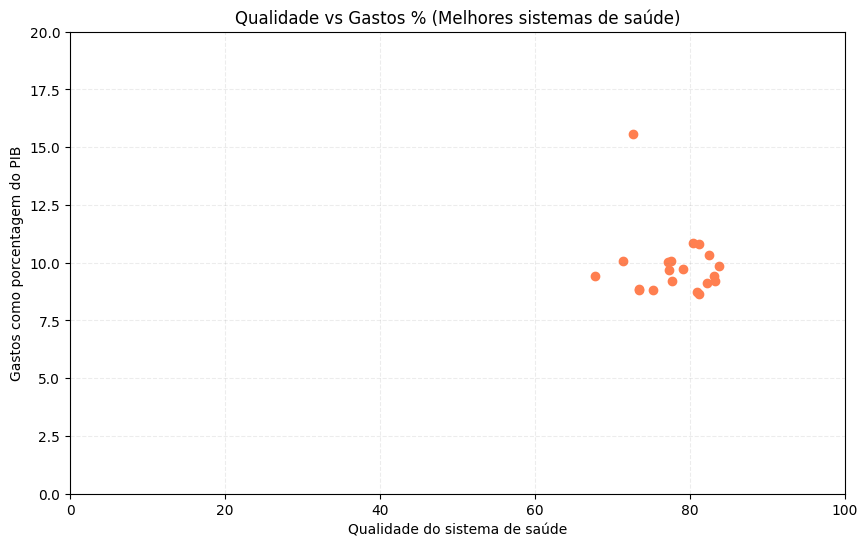

In [47]:
#gráfico de dispersão com os paises_top
plt.figure(figsize=(10, 6))
plt.scatter(paises_top['index'], paises_top['gméd%'], c = 'coral')
plt.xlabel('Qualidade do sistema de saúde')
plt.ylabel('Gastos como porcentagem do PIB')
plt.title('Qualidade vs Gastos % (Melhores sistemas de saúde)')
plt.grid(True, alpha = 0.15, linestyle ='--', color = 'gray')
plt.xlim(0, 100)
plt.ylim(0, 20)
plt.show()

## Veja que os dados estão dispersões sem um padrão muito exato agora. Esse padrão difere do inicial. Veja: parece existir uma maior aleatoriedade e não uma relação linear constante como antes.

## Matriz correlação para os melhores sistemas:

<Axes: >

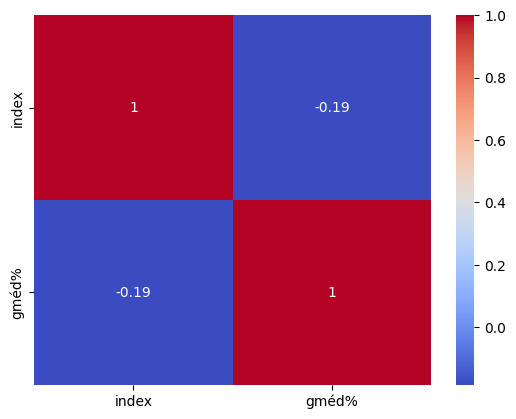

In [40]:
#criar a matriz de correlação com paises-top
corr_top = paises_top[['index', 'gméd%']].corr()
#gráfico da matriz de correlação
sns.heatmap(corr_top, annot=True, cmap='coolwarm')

## Veja que interessante: Quando filtramos a correlação para os 20 melhores sistemas o resultado da correlação fica "negativa". Note que é uma negativa linear fraquíssima que pode ser interpretada da seguinte forma: à medida que os gastos como percentual do PIB aumentam, para esse grupo dos melhores, há uma leve tendência de queda da qualidade, mas essa tendência é muito muito fraca.

## O importante é notar que a correlação tende a cair conforme lidamos com sistemas de saúde mais desenvolvidos!



---



## Conclusão:

## A correlação entre gastos e qualidade diminui para os melhores sistemas de saúde do mundo. Indicando que gastos e qualidade têm a ver, mas os retornos sobre a qualidade são cada vez menores conforme aumentamos a qualidade dos sistemas.
## Na economia, chamamos esse fenômeno de Rendimentos Marginais Decrescentes. Ou seja, os retornos do aumento de gastos com saúde diminuem conforme os países apresentam sistemas de saúde mais desenvolvidos. Dessa forma, países com sistemas de saúde mais desenvolvidos precisam focar mais em eficiência e qualidade que na quantidade de gastos!


## Mais pra frente, vou estudar a relação entre os piores países e verificar a correlação.